<h1>Import necessary library</h1>

In [1]:
import pandas as pd
import numpy as np
from tensorflow import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


<h1>Read csv</h1>

In [17]:
dataset = pd.read_csv('datasets/crop_recommendation.csv')
dataset

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


<h1>Data Preparation</h1>

In [18]:
dataset.tail()


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [19]:
# Change all the columns names into lowercases
df = pd.DataFrame(dataset)
df.columns = df.columns.str.lower()
df



,nitrogen,phosphorus,potassium,temperature,humidity,ph_value,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [20]:
# Check for null values
print(df.isna().sum())

# Columns information
print(df.info())

# Check for duplicate dataset
print(df.duplicated().sum())

nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph_value       0
rainfall       0
crop           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph_value     2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
0


In [30]:
# Split data into X and Y
X = df.drop('crop', axis=1)
y = df['crop']
print(f'Number of samples in the dataset : {X.shape[0]}')
print(f'Number features for each exmaple : {X.shape[1]}')
print(f'Features : {X.columns}')

print(f'Possible output classes : {y.unique()}')

Number of samples in the dataset : 2200
Number features for each exmaple : 7
Features : Index(['nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity',
       'ph_value', 'rainfall'],
      dtype='object')
Possible output classes : ['Rice' 'Maize' 'ChickPea' 'KidneyBeans' 'PigeonPeas' 'MothBeans'
 'MungBean' 'Blackgram' 'Lentil' 'Pomegranate' 'Banana' 'Mango' 'Grapes'
 'Watermelon' 'Muskmelon' 'Apple' 'Orange' 'Papaya' 'Coconut' 'Cotton'
 'Jute' 'Coffee']


In [34]:
# Convert the output strings into numeric equivalent
label_encoder = LabelEncoder()
y_label_encoded = label_encoder.fit_transform(y)
print(np.unique(y))

# Convert the y value to one-hot encoding
labels_categorical = to_categorical(y_label_encoded)

['Apple' 'Banana' 'Blackgram' 'ChickPea' 'Coconut' 'Coffee' 'Cotton'
 'Grapes' 'Jute' 'KidneyBeans' 'Lentil' 'Maize' 'Mango' 'MothBeans'
 'MungBean' 'Muskmelon' 'Orange' 'Papaya' 'PigeonPeas' 'Pomegranate'
 'Rice' 'Watermelon']


<h1>Building and training a model</h1>

In [35]:
# Standardize the X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Split the dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels_categorical, test_size=0.2, random_state=42)


In [83]:
# Build a model

from keras.regularizers import l2, l1_l2, l1


# def build_model():
#     model = Sequential()
#     model.add(Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(0.05)))
#     model.add(Dense(32, activation='relu',  kernel_regularizer=l2(0.05)))
#     model.add(Dense(labels_categorical.shape[1], activation='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(labels_categorical.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [84]:
# Training the model
model = build_model()

history = model.fit(X_train, y_train, batch_size=8, epochs=100, validation_data=(X_test, y_test), shuffle=True, verbose=1,)

Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2895 - loss: 2.6537 - val_accuracy: 0.7545 - val_loss: 1.1626
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8211 - loss: 0.8957 - val_accuracy: 0.9114 - val_loss: 0.4700
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.9304 - loss: 0.3859 - val_accuracy: 0.9250 - val_loss: 0.3002
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9359 - loss: 0.2492 - val_accuracy: 0.9386 - val_loss: 0.2288
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.9598 - loss: 0.1645 - val_accuracy: 0.9318 - val_loss: 0.2079
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.9565 - loss: 0.1451 - val_accuracy: 0.9455 - val_loss: 0.1715
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9727 - loss: 0.1081 - val_accuracy: 0.9591 - val_loss: 0.1475
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - accuracy: 0.9670 - loss: 0.1

In [85]:
# Evalutate the prediction
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

Test loss: 0.0972, Test accuracy: 0.9773


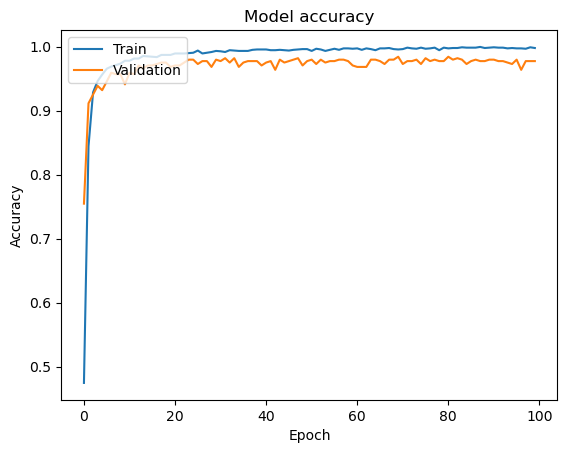

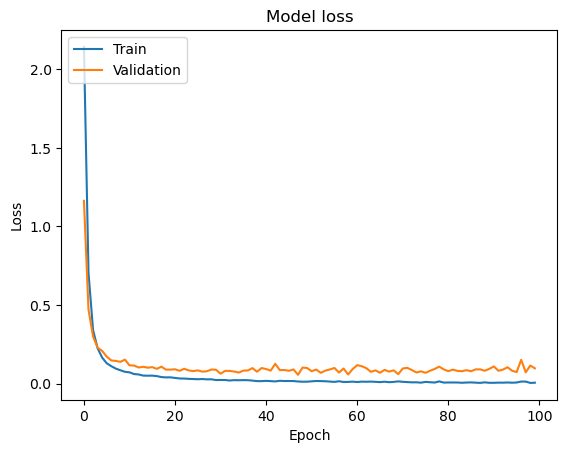

Best Accuracy on Validation Set = 0.9840909242630005


In [86]:
# Visualize
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

In [87]:
# # Get the accuracy score
# y_pred_one_hot = model.predict(X_test)
# y_pred = np.argmax(y_pred_one_hot, axis=1)
# y_test_labels = np.argmax(y_test, axis=1)

# # Convert the predictions into original labels
# y_pred_labels = label_encoder.inverse_transform(y_pred)
# y_test_labels_readable = label_encoder.inverse_transform(y_test_labels)
# print(y_test_labels_readable)

y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print(label_encoder.inverse_transform(y_test_labels))

accuracy = accuracy_score(y_pred, y_test_labels)
print(f'Accuracy : {accuracy * 100:.2f}%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
['Muskmelon' 'Watermelon' 'Papaya' 'Papaya' 'Apple' 'Mango' 'Apple'
 'MothBeans' 'MungBean' 'Lentil' 'Blackgram' 'Coconut' 'Pomegranate'
 'Jute' 'Coconut' 'Pomegranate' 'Apple' 'Maize' 'Papaya' 'Muskmelon'
 'Coffee' 'Papaya' 'Orange' 'Papaya' 'ChickPea' 'Jute' 'MungBean' 'Orange'
 'PigeonPeas' 'Rice' 'Pomegranate' 'MothBeans' 'Jute' 'Lentil' 'Jute'
 'Blackgram' 'Jute' 'ChickPea' 'ChickPea' 'KidneyBeans' 'Papaya' 'Mango'
 'Blackgram' 'Maize' 'MungBean' 'Maize' 'PigeonPeas' 'Coconut' 'Muskmelon'
 'Maize' 'Blackgram' 'Coffee' 'Grapes' 'MungBean' 'Coffee' 'KidneyBeans'
 'Cotton' 'Apple' 'Banana' 'Blackgram' 'Watermelon' 'Coconut' 'Lentil'
 'Orange' 'Papaya' 'PigeonPeas' 'Orange' 'Rice' 'Muskmelon' 'PigeonPeas'
 'Muskmelon' 'Coconut' 'Jute' 'Banana' 'Blackgram' 'Papaya' 'Banana'
 'Cotton' 'Watermelon' 'Orange' 'Coffee' 'ChickPea' 'Rice' 'MothBeans'
 'Orange' 'Mango' 'Coffee' 'MothBeans' 'Blackgram' 'Pomegranate' 'Maize'
 'MothBeans' 'Cotton' 'Papaya' 

In [63]:
N = 0 #Nitrogen
P = 0 #Phosphorus
K = 0  # Potassium
T = 150  # Temperature
H = 200  # Humidity
pH = 200 # PH value
R = 1000# Rainfall

user_testing = np.array([[N, P, K, T, H, pH, R]])
user_y_pred_one_hot = model.predict(user_testing)
y_label = np.argmax(user_y_pred_one_hot, axis=1)
print(f'Output : {label_encoder.inverse_transform(y_label)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Output : ['Coconut']
